# Predicción del precio de las acciones de NVIDIA 

# Descripción general

## Datos diarios del precio de las acciones de Nvidia 
Este conjunto de datos proporciona una recopilación completa de datos diarios sobre el precio de las acciones de Nvidia Corporation (NVDIA), que abarcan un período de 20 años **desde el 2 de enero de 2004 hasta el 1 de enero de 2024.** Nvidia, líder mundial en unidades de procesamiento gráfico (GPU) y tecnologías de inteligencia artificial, ha experimentado un crecimiento exponencial, en particular en los últimos años, a medida que se convirtió en un actor importante en inteligencia artificial, juegos y vehículos autónomos. Este conjunto de datos captura los movimientos y las tendencias clave del mercado durante el importante ascenso de Nvidia a la prominencia.


## Introducción

En este proyecto realizaré un análisis de series temporales y modelado predictivo del mercado de valores.

- Hare un analisis exploratorio de los datos, asi como un preprocesamiento de los datos 
- Utilizare modelos de Regresión y hare una comparación para escoger el mejor modelo 
- Finalmente comunicare mis resultados obtenidos 

(para este proyecto utilizaré los datos diarios del precio de las acciones de Nvidia desde el 2 de enero del 2004 hasta el 1 de enero del 2024.)

# Descripción de los datos

El conjunto de datos contiene datos financieros cruciales para las acciones de Nvidia, incluidos los precios de apertura, máximos, mínimos y de cierre, así como el volumen de operaciones de cada día en el período de 20 años. 

- `Date` La fecha del registro del precio de la acción.
- `Open` El precio de la acción al comienzo del día de negociación.
- `High`  El precio más alto que la acción de Nvidia alcanzó durante el día.
- `Low` El precio más bajo que la acción de Nvidia alcanzó durante el día.
- `Close` El precio de la acción al final del día de negociación.
- `Volume`  El número total de acciones de Nvidia negociadas durante el día.

# Importamos librerias y cargamos los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import mean_squared_error, make_scorer, r2_score


In [2]:
df = pd.read_csv("C:\\Users\\T3R4BYT3\\Downloads\\archive\\nvidia_stock_prices.csv", index_col=[0], parse_dates=[0])

este código lee un archivo CSV que contiene datos de las acciones de nvidia, utiliza la primera columna como el índice del DataFrame, y convierte los valores de esa columna a objetos datetime. Nos dimos cuenta al ver los datos por eso decidimos cargar el dataset de esa manera!!

# Análisis exploratorio de los datos. (EDA)

In [3]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-01-02,0.196417,0.199083,0.192333,0.192333,436416000
2004-01-05,0.195250,0.199917,0.193500,0.198583,575292000
2004-01-06,0.198000,0.209417,0.197083,0.206667,1093344000
2004-01-07,0.204333,0.209500,0.202917,0.208500,673032000
2004-01-08,0.211083,0.212083,0.207250,0.209250,433752000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5033 non-null   float64
 1   High    5033 non-null   float64
 2   Low     5033 non-null   float64
 3   Close   5033 non-null   float64
 4   Volume  5033 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Podemos ver que hay 5033 filas con 5 columnas con su tipo de dato correcto  y no hay valores nulos ni duplicados

In [7]:
df.describe()

,Open,High,Low,Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,5.214671,5.308604,5.117086,5.217039,5.587962e+08
std,9.643976,9.811276,9.465058,9.644928,3.363408e+08
min,0.080583,0.083917,0.077500,0.078583,4.564400e+07
25%,0.344000,0.349000,0.336500,0.343250,3.482920e+08
50%,0.544000,0.552750,0.532500,0.542000,4.910920e+08
75%,5.233750,5.296500,5.125000,5.229000,6.816760e+08
max,50.216000,50.548000,49.411999,50.409000,5.088948e+09


In [8]:
df.index.is_monotonic_increasing

True

Vemos que las fechas si se encuentran en orden cronologico!

## Visualización de tendencia  del precio de cierre

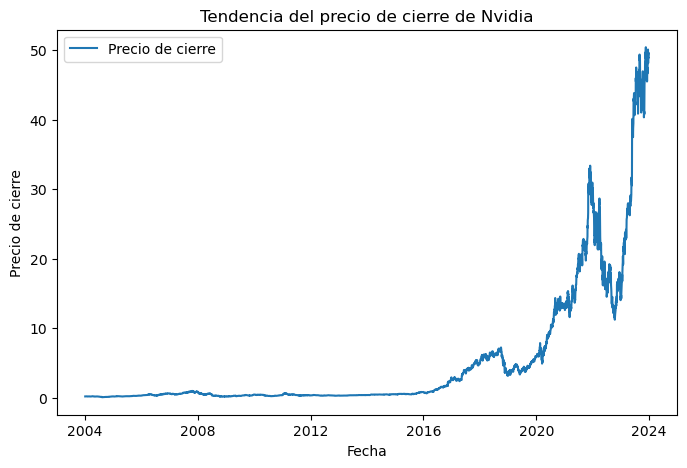

In [9]:
# Un gráfico de líneas para ver cómo los precios de apertura o cierre han cambiado con el tiempo.
plt.figure(figsize=(8,5))
plt.plot(df.index, df['Close'], label='Precio de cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Tendencia del precio de cierre de Nvidia')
plt.legend()
plt.show()

Podemos ver en esta grafica como el precio de cierre de las acciones de Nvidia antes del año 2016 se mantenía por debajo de  un dolar, de ahi comienza a subir teniendo un pequeño pico de 8 dolares como por el 2018, apartir de ahi hay una pequeña bajada pero apartir del 2020 comienza otra subida teneindo un pico de 30 dolares en el 2022 y **actualmente en el 2024 alcanzando otro pico de 50 dolares en el precio de cierre!!**

## Visualización  del volumen de operaciones

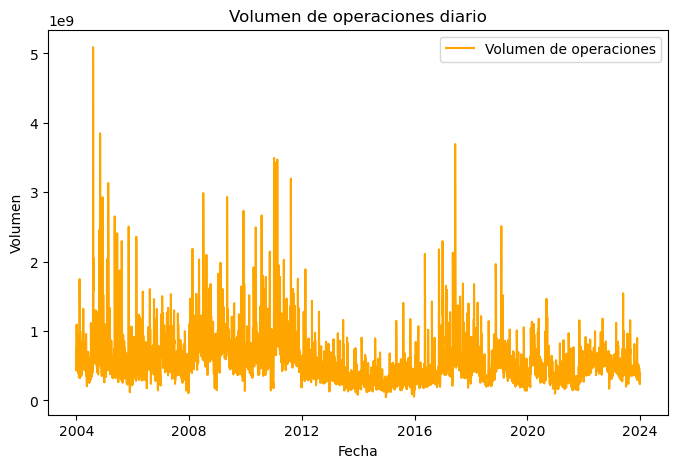

In [10]:
plt.figure(figsize=(8,5))
plt.plot(df.index, df['Volume'], label='Volumen de operaciones', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Volumen de operaciones diario')
plt.legend()
plt.show()


## Correlación entre variables

In [11]:
# Vamos a analizar cómo se correlacionan las variables como el precio de apertura, cierre, máximo y mínimo.
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
correlation_matrix

,Open,High,Low,Close,Volume
Open,1.000000,0.999843,0.999824,0.999600,-0.127345
High,0.999843,1.000000,0.999799,0.999820,-0.125491
Low,0.999824,0.999799,1.000000,0.999829,-0.129391
Close,0.999600,0.999820,0.999829,1.000000,-0.127480
Volume,-0.127345,-0.125491,-0.129391,-0.127480,1.000000


**Alta correlación entre los precios:**


"Los precios de apertura, máximo, mínimo y cierre en datos financieros diarios están altamente correlacionados (cercanos a 1), ya que están directamente relacionados y dependen de las mismas fuerzas del mercado."

**Correlación negativa con el volumen:**

"Existe una correlación negativa débil (-0.12 a -0.13) entre el volumen de operaciones y los precios, sugiriendo que días con mayor volumen tienden a tener precios más bajos, posiblemente indicando mayor volatilidad."

(Ahora investigaremos la relación entre el volumen y la volatilidad de los precios)

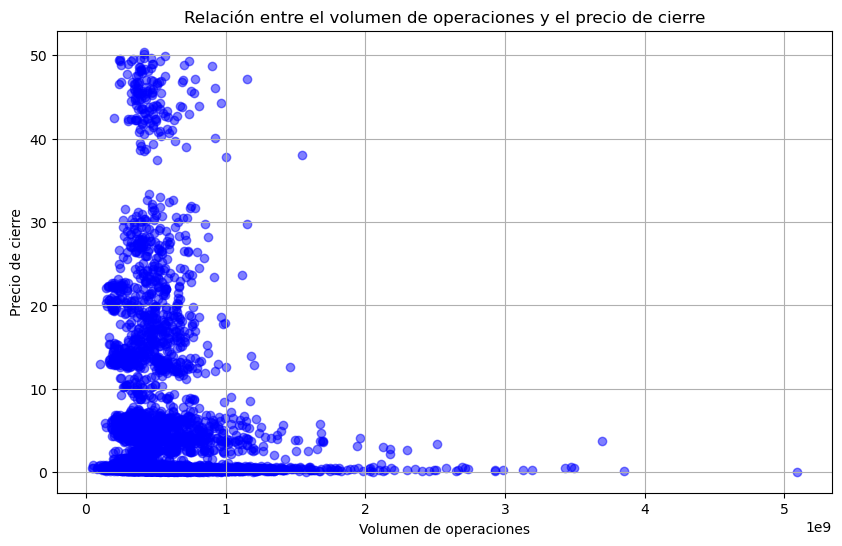

In [12]:
# Crearemos un grafico de dispersión entre el volumen y el precio de cierre para visualizar mejor esa relación.
plt.figure(figsize=(10,6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5, c='blue')
plt.title('Relación entre el volumen de operaciones y el precio de cierre')
plt.xlabel('Volumen de operaciones')
plt.ylabel('Precio de cierre')
plt.grid(True)
plt.show()

Podemos ver que entre menor volumen de operaciones el precio del cierre es más alto!!

# Preprosesamiento de los datos

## Nuestra serie temporal es: ¿estacionaria ó no estacionaria?

### Prueba ADF

In [13]:
#Realizar la prueba ADF:
from statsmodels.tsa.stattools import adfuller

for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
    result = adfuller(df[column])
    print(f'Prueba ADF para {column}:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))
    print('\n')

Prueba ADF para Open:
ADF Statistic: 2.0683221546790063
p-value: 0.9987554114293713
Critical Value (1%): -3.432
Critical Value (5%): -2.862
Critical Value (10%): -2.567


Prueba ADF para High:
ADF Statistic: 2.050210642338408
p-value: 0.9987347466044293
Critical Value (1%): -3.432
Critical Value (5%): -2.862
Critical Value (10%): -2.567


Prueba ADF para Low:
ADF Statistic: 1.947970037907256
p-value: 0.9986014061541485
Critical Value (1%): -3.432
Critical Value (5%): -2.862
Critical Value (10%): -2.567


Prueba ADF para Close:
ADF Statistic: 2.091361867048481
p-value: 0.9987805185477441
Critical Value (1%): -3.432
Critical Value (5%): -2.862
Critical Value (10%): -2.567


Prueba ADF para Volume:
ADF Statistic: -5.989955321420612
p-value: 1.7552615346711668e-07
Critical Value (1%): -3.432
Critical Value (5%): -2.862
Critical Value (10%): -2.567




Podemos ver que nuestra serie **no es estacionaria** nuestro valor p esta por arriba de 0.5, como se podia ver en la visualizacion de los datos puede ser por el aumento de la inteligenmcia artificial y el avance de la tecnología que haya impactado el precio de las acciones de nvidia!!

### Decompose

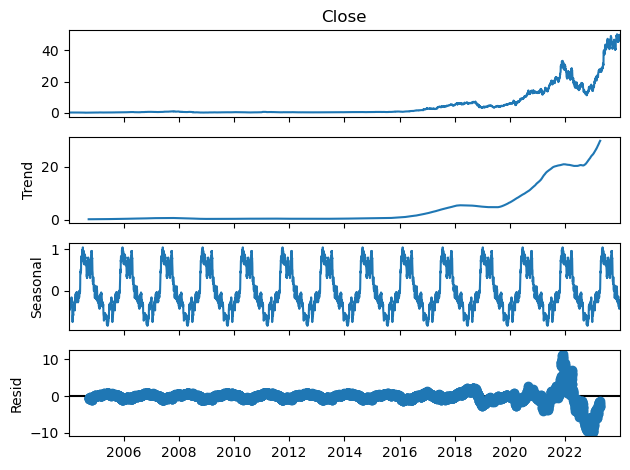

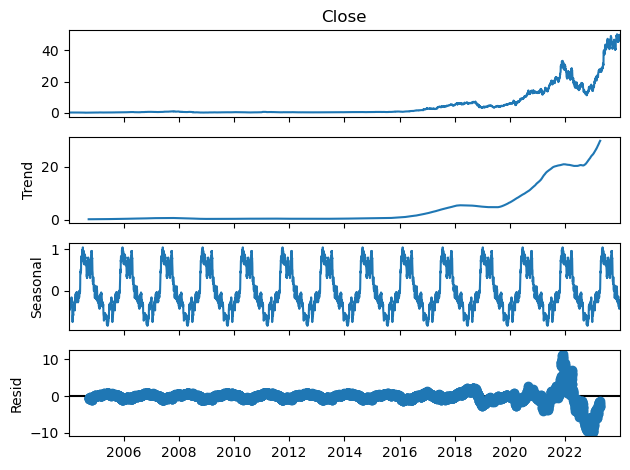

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df['Close'], model='additive', period=365)  
decomposed.plot()


1.-**Serie original (Cerrar**: Muestra una tendencia clara al alza, con un aumento significativo hacia el final del período. Esto indica que la serie no es estacionaria debido a esta tendencia creciente.

2.-**Tendencia (Trend)**: Aquí se separa la tendencia de la serie, evidenciando que hay un crecimiento constante en los precios a largo plazo. Este componente contribuye a la no estacionariedad.

3.-**Estacionalidad (Seasonal)**: Muestra patrones cíclicos regulares, lo que significa que hay un componente estacional fuerte en los datos. Esto es importante para identificar y ajustar si es necesario.

4.-**Residuales (Resid)**: Representa las fluctuaciones que quedan después de remover la tendencia y la estacionalidad. Este componente debería ser más estacionario, ya que elimina las causas principales de no estacionariedad.

### Ajustar la serie para convertirla en estacionaria :

<Axes: xlabel='Date'>

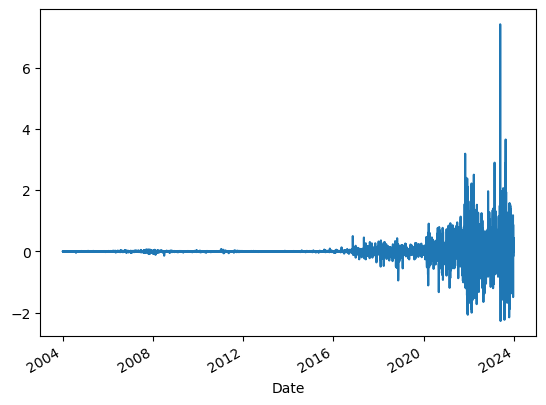

In [15]:
df['Close'] = df['Close'].diff()
df['Close'].plot()

In [16]:
# Prueba ADF:

result = adfuller(df['Close'].dropna())  # Aseguramos de eliminar valores NaN después de .diff()
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))


ADF Statistic: -10.104774321093561
p-value: 1.0368504440112589e-17
Critical Value (1%): -3.432
Critical Value (5%): -2.862
Critical Value (10%): -2.567


In [17]:
df['Close']= df['Close'].diff()

In [18]:
# Prueba ADF:

result = adfuller(df['Close'].dropna())  # Aseguramos de eliminar valores NaN después de .diff()
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))


ADF Statistic: -24.67601539098545
p-value: 0.0
Critical Value (1%): -3.432
Critical Value (5%): -2.862
Critical Value (10%): -2.567


tuvimos que hacer **2** veces la **diferenciación** para poder hacer a nuestra serie en estacionaria!!

In [19]:
df['Close'].isna().sum()

2

In [20]:
df['Close'].head()

Date
2004-01-02         NaN
2004-01-05         NaN
2004-01-06    0.001834
2004-01-07   -0.006251
2004-01-08   -0.001083
Name: Close, dtype: float64

In [21]:
df.shape

(5033, 5)

## Agregando nuevas características

In [22]:
#Vamos a usar la media móvil para reducir las fluctuaciones en la serie temporal 
df['rolling_mean'] = df['Close'].rolling(10).mean()

In [23]:
df['std'] = df['Close'].rolling(10).std()

In [24]:
# Crear características de tiempo
df.loc[:, 'year'] = df.index.year
df.loc[:, 'day'] = df.index.day
df.loc[:, 'month'] = df.index.month

In [25]:
df.head()

,Open,High,Low,Close,Volume,rolling_mean,std,year,day,month
Date,,,,,,,,,,
2004-01-02,0.196417,0.199083,0.192333,NaN,436416000,NaN,NaN,2004,2,1
2004-01-05,0.195250,0.199917,0.193500,NaN,575292000,NaN,NaN,2004,5,1
2004-01-06,0.198000,0.209417,0.197083,0.001834,1093344000,NaN,NaN,2004,6,1
2004-01-07,0.204333,0.209500,0.202917,-0.006251,673032000,NaN,NaN,2004,7,1
2004-01-08,0.211083,0.212083,0.207250,-0.001083,433752000,NaN,NaN,2004,8,1


## Creacion de retrasos (lags)

In [26]:
# Crear características de retrasos (lags)
for lag in range(1, 7):
    df.loc[:, f'lag_{lag}'] = df['Close'].shift(lag)
    
# Eliminar filas con valores NaN
df = df.dropna()

In [27]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
rolling_mean    0
std             0
year            0
day             0
month           0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
lag_5           0
lag_6           0
dtype: int64

<Axes: xlabel='Date'>

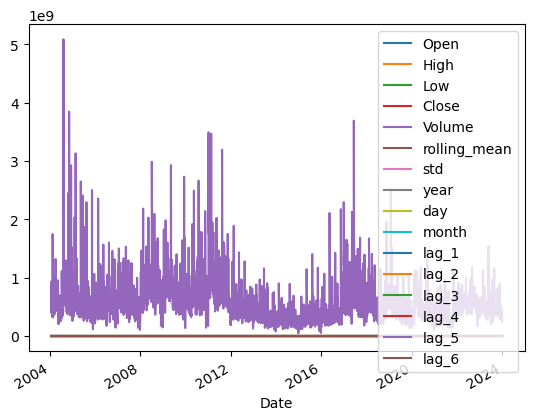

In [28]:
df.plot()

# Creaciones de Modelos de Machine Learning


## Separar Caracteristicas y el Objetivo de la variable a predecir

In [29]:
# Definir las características y el objetivo
X = df.drop(columns=['Close'])
y = df['Close'] # Tomaremos como nuestra variable a predecir el precio de cierre

## División de Datos en Conjuntos de Entrenamiento y Prueba


In [30]:
# Dividir los datos en entrenamiento (90%) y prueba (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [31]:
print(X_train.index.min(), X_train.index.max())
print(X_test.index.min(), X_test.index.max())

2004-01-20 00:00:00 2021-12-29 00:00:00
2021-12-30 00:00:00 2023-12-29 00:00:00


## Regresión Lineal

### Realizar la búsqueda de hiperparámetros utilizando GridSearchCV en Regresión Lineal: 

In [32]:
# Definir los hiperparámetros que deseamos probar en Regresión Lineal
parametros_grid_linear = { 'fit_intercept': [True, False], 'copy_X': [True, False] }

# Realizar GridSearchCV en Regresión Lineal para encontrar los mejores hiperparámetros
grid_search_linear = GridSearchCV(LinearRegression(), parametros_grid_linear, cv=5, scoring='neg_mean_squared_error') 
grid_search_linear.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [33]:
# Obtener los mejores hiperparámetros para Regresión Lineal
bestparams_linear = grid_search_linear.best_params_

In [34]:
# Crear el modelo de Regresión Lineal con los mejores hiperparámetros y realizar la validación cruzada: 
model_lr = LinearRegression(**bestparams_linear)

In [35]:
# Realizar la validación cruzada y encontrar los mejores hiperparámetros en Regresión Lineal
mse_scores_linear = -cross_val_score(model_lr, X_train, y_train, cv=3, scoring='neg_mean_squared_error')

rmse_scores_linear = np.sqrt(mse_scores_linear)

r2_scores_linear = cross_val_score(model_lr, X_train, y_train, cv=3, scoring='r2')

In [36]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [37]:
# Realizar predicciones
y_pred_lr = model_lr.predict(X_test)

In [38]:
# Evaluar el modelo ECM, RECM Y R2
mse_lr = mean_squared_error(y_test, y_pred_lr)

rmse_lr = np.sqrt(mse_lr)

r2 = r2_score(y_test, y_pred_lr)

## RandomForestRegressor

###  Realizar la búsqueda de hiperparámetros utilizando GridSearchCV en RandomForestRegressor:

In [39]:
# Definir los hiperparámetros que deseas probar en RandomForestRegressor
parametros_grid_rf = { 'n_estimators': [10, 20, 50], 'max_depth': [None, 4, 5] }

# Realizar GridSearch en RandomForestRegressor para encontrar los mejores hiperparámetros
grid_search_rf = GridSearchCV(RandomForestRegressor(), parametros_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 5],
                         'n_estimators': [10, 20, 50]},
             scoring='neg_mean_squared_error')

In [40]:
# Obtener los mejores hiperparámetros para RandomForestRegressor
bestparams_rf = grid_search_rf.best_params_ 

In [41]:
# Crear el modelo de RandomForestRegressor con los mejores hiperparámetros y realizar la validación cruzada: 
model_rf = RandomForestRegressor(**bestparams_rf)

In [42]:
# Realizar la validación cruzada y encontrar los mejores hiperparámetros en RandomForestRegressor
mse_scores_rf = -cross_val_score(model_rf, X_train, y_train, cv=3, scoring='neg_mean_squared_error')

rmse_scores_rf = np.sqrt(mse_scores_rf) 

r2_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=3, scoring='r2')

In [43]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [44]:
# Realizar predicciones
y_pred_rf = model_rf.predict(X_test)

In [45]:
# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)

rmse_rf = np.sqrt(mse_rf)

r2 = r2_score(y_test, y_pred_rf)

## Comparacion de evaluacion de ambos modelos (métricas)

### Validacion cruzada (promedio)

In [46]:
# Imprimir los resultados del promedio de los folds de la validacion cruzada
print("Regresión Lineal - ECM:", mse_scores_linear.mean())
print("Regresión Lineal - RECM:", rmse_scores_linear.mean())
print("Regresión Lineal - R2:", r2_scores_linear.mean())
print(' ')
print("RandomForestRegressor - ECM:", mse_scores_rf.mean())
print("RandomForestRegressor - RECM:", rmse_scores_rf.mean())
print("RandomForestRegressor - R2:", r2_scores_rf.mean())

Regresión Lineal - ECM: 0.014255334524677558
Regresión Lineal - RECM: 0.07489907432779047
Regresión Lineal - R2: 0.7429996792769954
 
RandomForestRegressor - ECM: 0.059518283374629936
RandomForestRegressor - RECM: 0.14851495089345945
RandomForestRegressor - R2: 0.3923663427584922


### Conjunto de Prueba

In [47]:
print('ECM:', mse_lr)
print(f"RMSE Linear Regression: {rmse_lr}")
r2 = r2_score(y_test, y_pred_lr)
print("Coeficiente de determinación Regresion lineal (R^2):", r2)
print(' ')
print('ECM:', mse_rf)
print(f"RMSE Random Forest: {rmse_rf}")
r2 = r2_score(y_test, y_pred_rf)
print("Coeficiente de determinación RandomForest (R^2):", r2)


ECM: 0.3905614579342895
RMSE Linear Regression: 0.6249491642800152
Coeficiente de determinación Regresion lineal (R^2): 0.7558930072856541
 
ECM: 0.8697742439167593
RMSE Random Forest: 0.9326168794938033
Coeficiente de determinación RandomForest (R^2): 0.4563775541348072


# Informe de resultados

Para evaluar la estabilidad del modelo y detectar posibles signos de sobreajuste, se realizó una **validación cruzada**.ECM y RECM fueron ambos valores bastante bajos, lo que indica un buen ajuste a los datos.Tanto en la regresion lineal como en el bosque aleatorio.

## Regresión lineal:

### Resultados del conjunto de Prueba

- ECM y RECM: Valores bajos, lo que indica que el modelo tiene un buen ajuste a los datos.

- R²: Un coeficiente de determinación de 0.7558 sugiere que el modelo de regresión lineal explica aproximadamente el **75.58%** de la variabilidad en los datos. Este es un buen resultado, indicando que nuestro modelo de regresión lineal está funcionando bastante bien.

## Random Forest:

### Resultados del conjunto de Prueba

- ECM y RECM: Valores más altos en comparación con la regresión lineal, lo que indica un ajuste menos preciso.

- R²: Un coeficiente de determinación de 0.43286 muestra que el modelo explica aproximadamente el **43.28%** de la variabilidad en los datos, lo cual es más bajo comparado con la regresión lineal, pero sigue siendo un resultado aceptable dado que los modelos de bosque aleatorio son buenos para capturar patrones no lineales.

### Conclusión Final:

El modelo de regresión lineal obtuvo un coeficiente de determinación (R²) de 0.7558, lo que indica que explica aproximadamente el 75.58% de la variabilidad en los datos. Este resultado sugiere que el modelo tiene un buen rendimiento general y es capaz de capturar la  mayoría de las tendencias en los datos. Además los indicadores de validación sugieren que el modelo está evitando el sobreajuste, lo que lo convierte en una opción adecuada para esta tarea de predicción.